In [3]:
!pip install lasio

Импортируем необходимые библиотеки

In [5]:
import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
well = lasio.read("D:/Master`s Degree/2_semester/homework/скважина-1.las")
well = well.df()
well_1 = well.reset_index()
display(well_1)

,DEPT,AK,BK,BK_3,DS,DS_2,DT_1,GGP,GGP_1,GK,GK_3,NNB,NNB_1,PS,PS_3
0,3650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.409
1,3650.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.669
2,3650.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.159
3,3650.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.266
4,3650.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,4231.6,NaN,19.58,NaN,197.33,NaN,NaN,NaN,NaN,6.630,NaN,9.580,NaN,207.652,NaN
5817,4231.7,NaN,18.74,NaN,197.52,NaN,NaN,NaN,NaN,6.932,NaN,9.451,NaN,207.554,NaN
5818,4231.8,NaN,18.79,NaN,197.64,NaN,NaN,NaN,NaN,7.059,NaN,9.240,NaN,207.476,NaN
5819,4231.9,NaN,18.22,NaN,197.66,NaN,NaN,NaN,NaN,7.031,NaN,8.980,NaN,207.437,NaN


In [7]:
print(well_1.keys())

Index(['DEPT', 'AK', 'BK', 'BK_3', 'DS', 'DS_2', 'DT_1', 'GGP', 'GGP_1', 'GK',
       'GK_3', 'NNB', 'NNB_1', 'PS', 'PS_3'],
      dtype='object')


Визуализируем исходные данные

In [9]:
def plot_las(logs_for_print):
    # Создание фигуры и осей
    num_logs = len(logs_for_print.columns) - 1  # Количество графиков (исключаем DEPT)
    fig, axes = plt.subplots(1, num_logs, figsize=(50, 20))
    
    # Если только один график, axes будет не массивом, а одним объектом
    if num_logs == 1:
        axes = [axes]
    
    # Перебор столбцов (кроме DEPT)
    for idx, column_name in enumerate(logs_for_print.columns.drop('DEPT')):
        # Проверка, что данные не являются строковыми
        if logs_for_print[column_name].dtype != 'object':
            # Построение графика
            axes[idx].plot(logs_for_print[column_name], logs_for_print['DEPT'])
            axes[idx].invert_yaxis()  # Инвертирование оси Y
            axes[idx].set_title(column_name)  # Установка заголовка

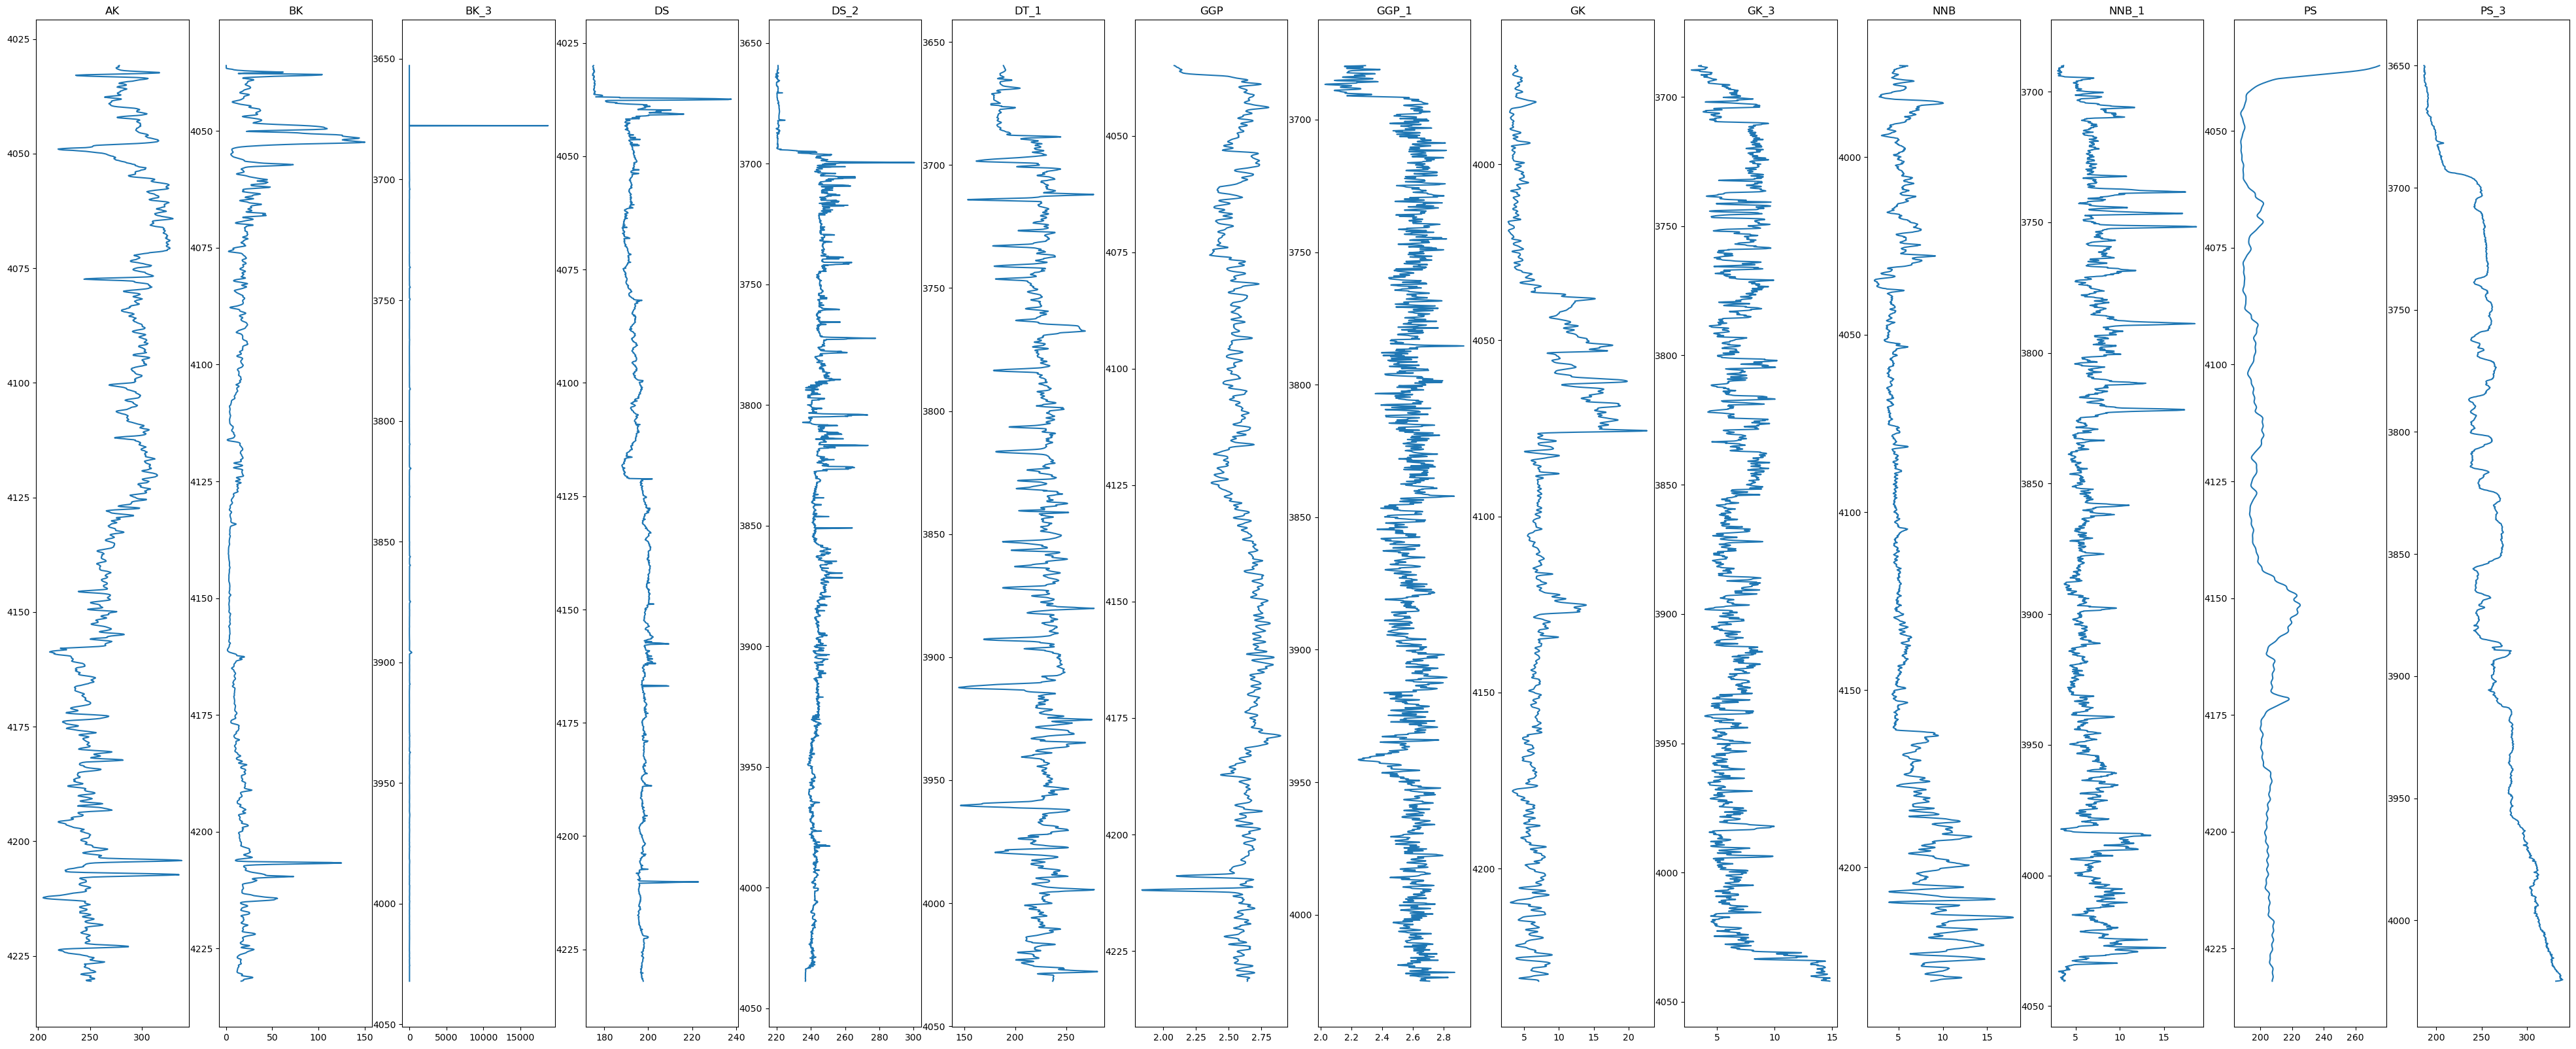

In [10]:
plot_las(well_1)

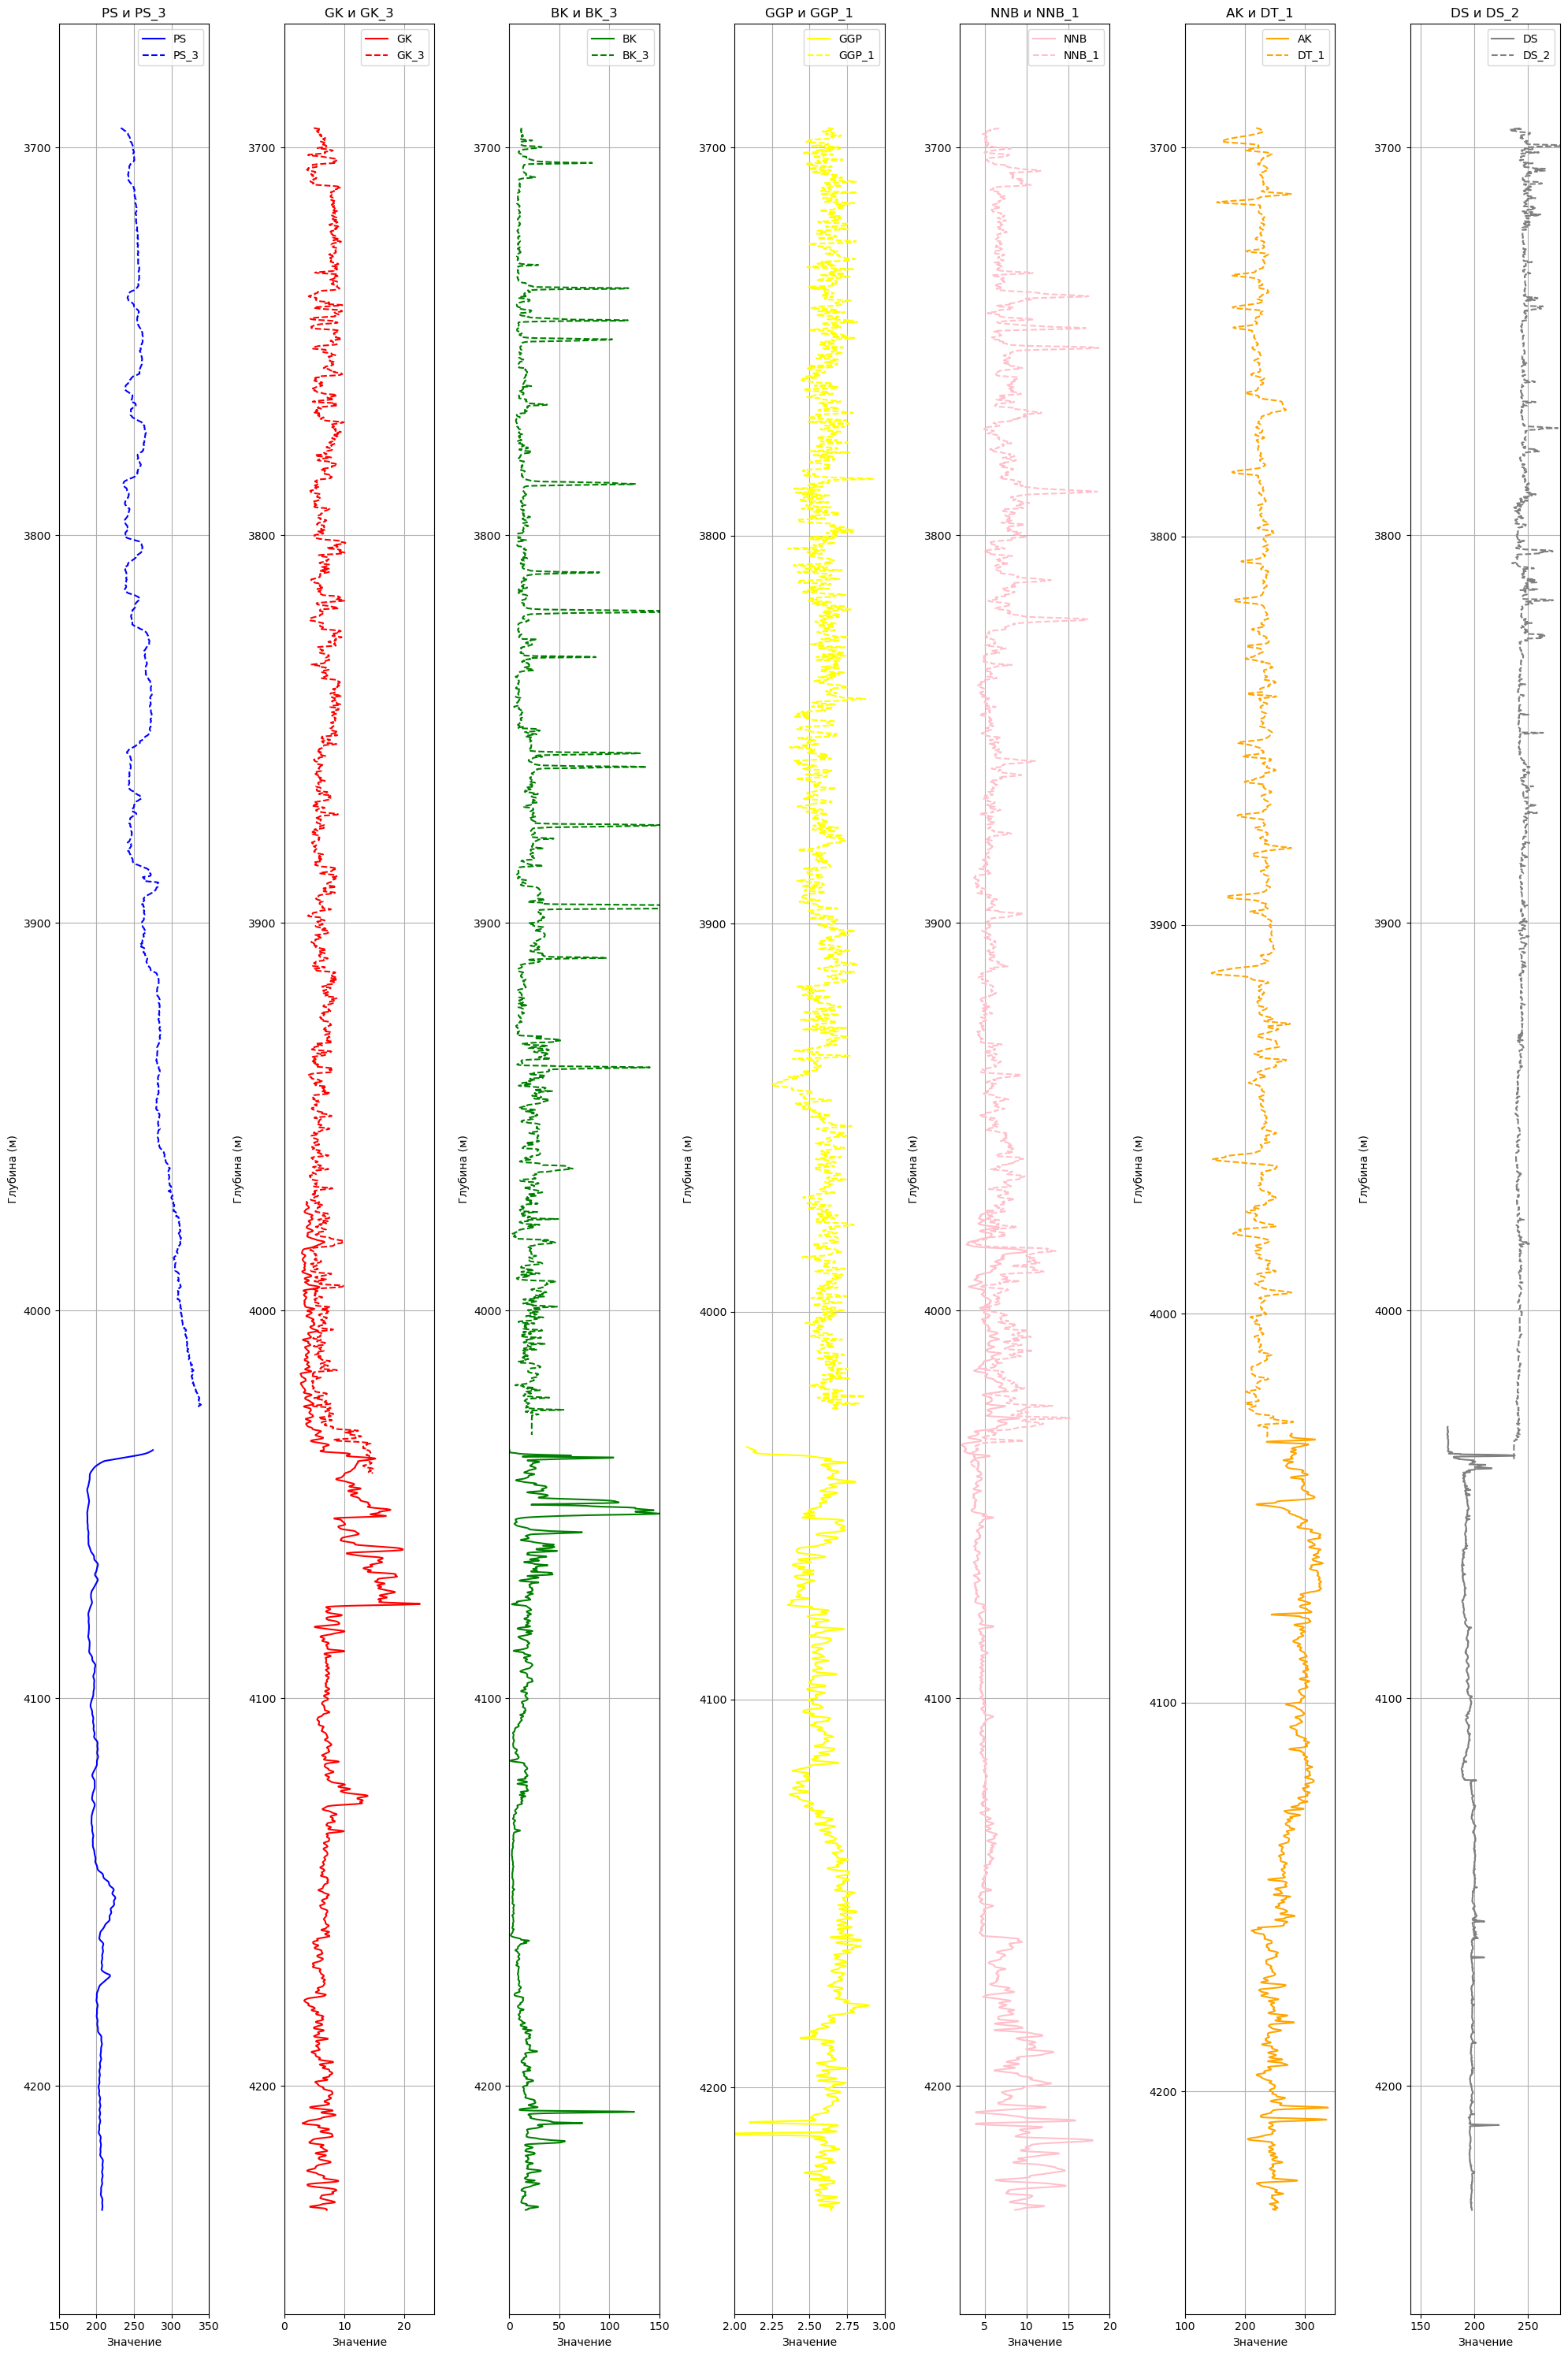

In [11]:
import matplotlib.pyplot as plt

def plot_well_curves(well_data, primary_curves, secondary_curves, colors, scales, depth_min=None, depth_max=None):
    """
    Визуализирует пары кривых скважинных данных с возможностью фильтрации по глубине.

    """
    # Фильтрация данных по глубине
    if depth_min is not None and depth_max is not None:
        well_data = well_data[(well_data['DEPT'] >= depth_min) & (well_data['DEPT'] <= depth_max)]
    
    num_plots = len(primary_curves)
    fig, axes = plt.subplots(1, num_plots, figsize=(20, 30))
    
  
    if num_plots == 1:
        axes = [axes]
    
    # Построение графиков для каждой пары кривых
    for ax, primary, secondary, color, (x_min, x_max) in zip(axes, primary_curves, secondary_curves, colors, scales):
        # Основная кривая
        ax.plot(well_data[primary], well_data['DEPT'], color=color, label=primary)
        # Вспомогательная кривая (пунктирная линия)
        ax.plot(well_data[secondary], well_data['DEPT'], color=color, linestyle='--', label=secondary)
        
        # Настройка осей и внешнего вида
        ax.set_xlim(x_min, x_max)
        ax.set_xlabel("Значение")
        ax.set_ylabel("Глубина (м)")
        ax.invert_yaxis()  # Глубина увеличивается сверху вниз
        ax.grid(True)  # Сетка
        ax.legend()  # Легенда
        ax.set_title(f"{primary} и {secondary}")  # Заголовок
    
    # Отображение графиков
    plt.tight_layout()
    plt.show()

# Данные для построения
primary_curves = ['PS', 'GK', 'BK', 'GGP', 'NNB', 'AK', 'DS']
secondary_curves = ['PS_3', 'GK_3', 'BK_3', 'GGP_1', 'NNB_1', 'DT_1', 'DS_2']
colors = ["blue", "red", "green", "yellow", "pink", "orange", "grey"]
scales = [(150, 350), (0, 25), (0, 150), (2, 3), (2, 20), (100, 350), (140, 280)]


plot_well_curves(well_1, primary_curves, secondary_curves, colors, scales, depth_min=3695, depth_max=4250)

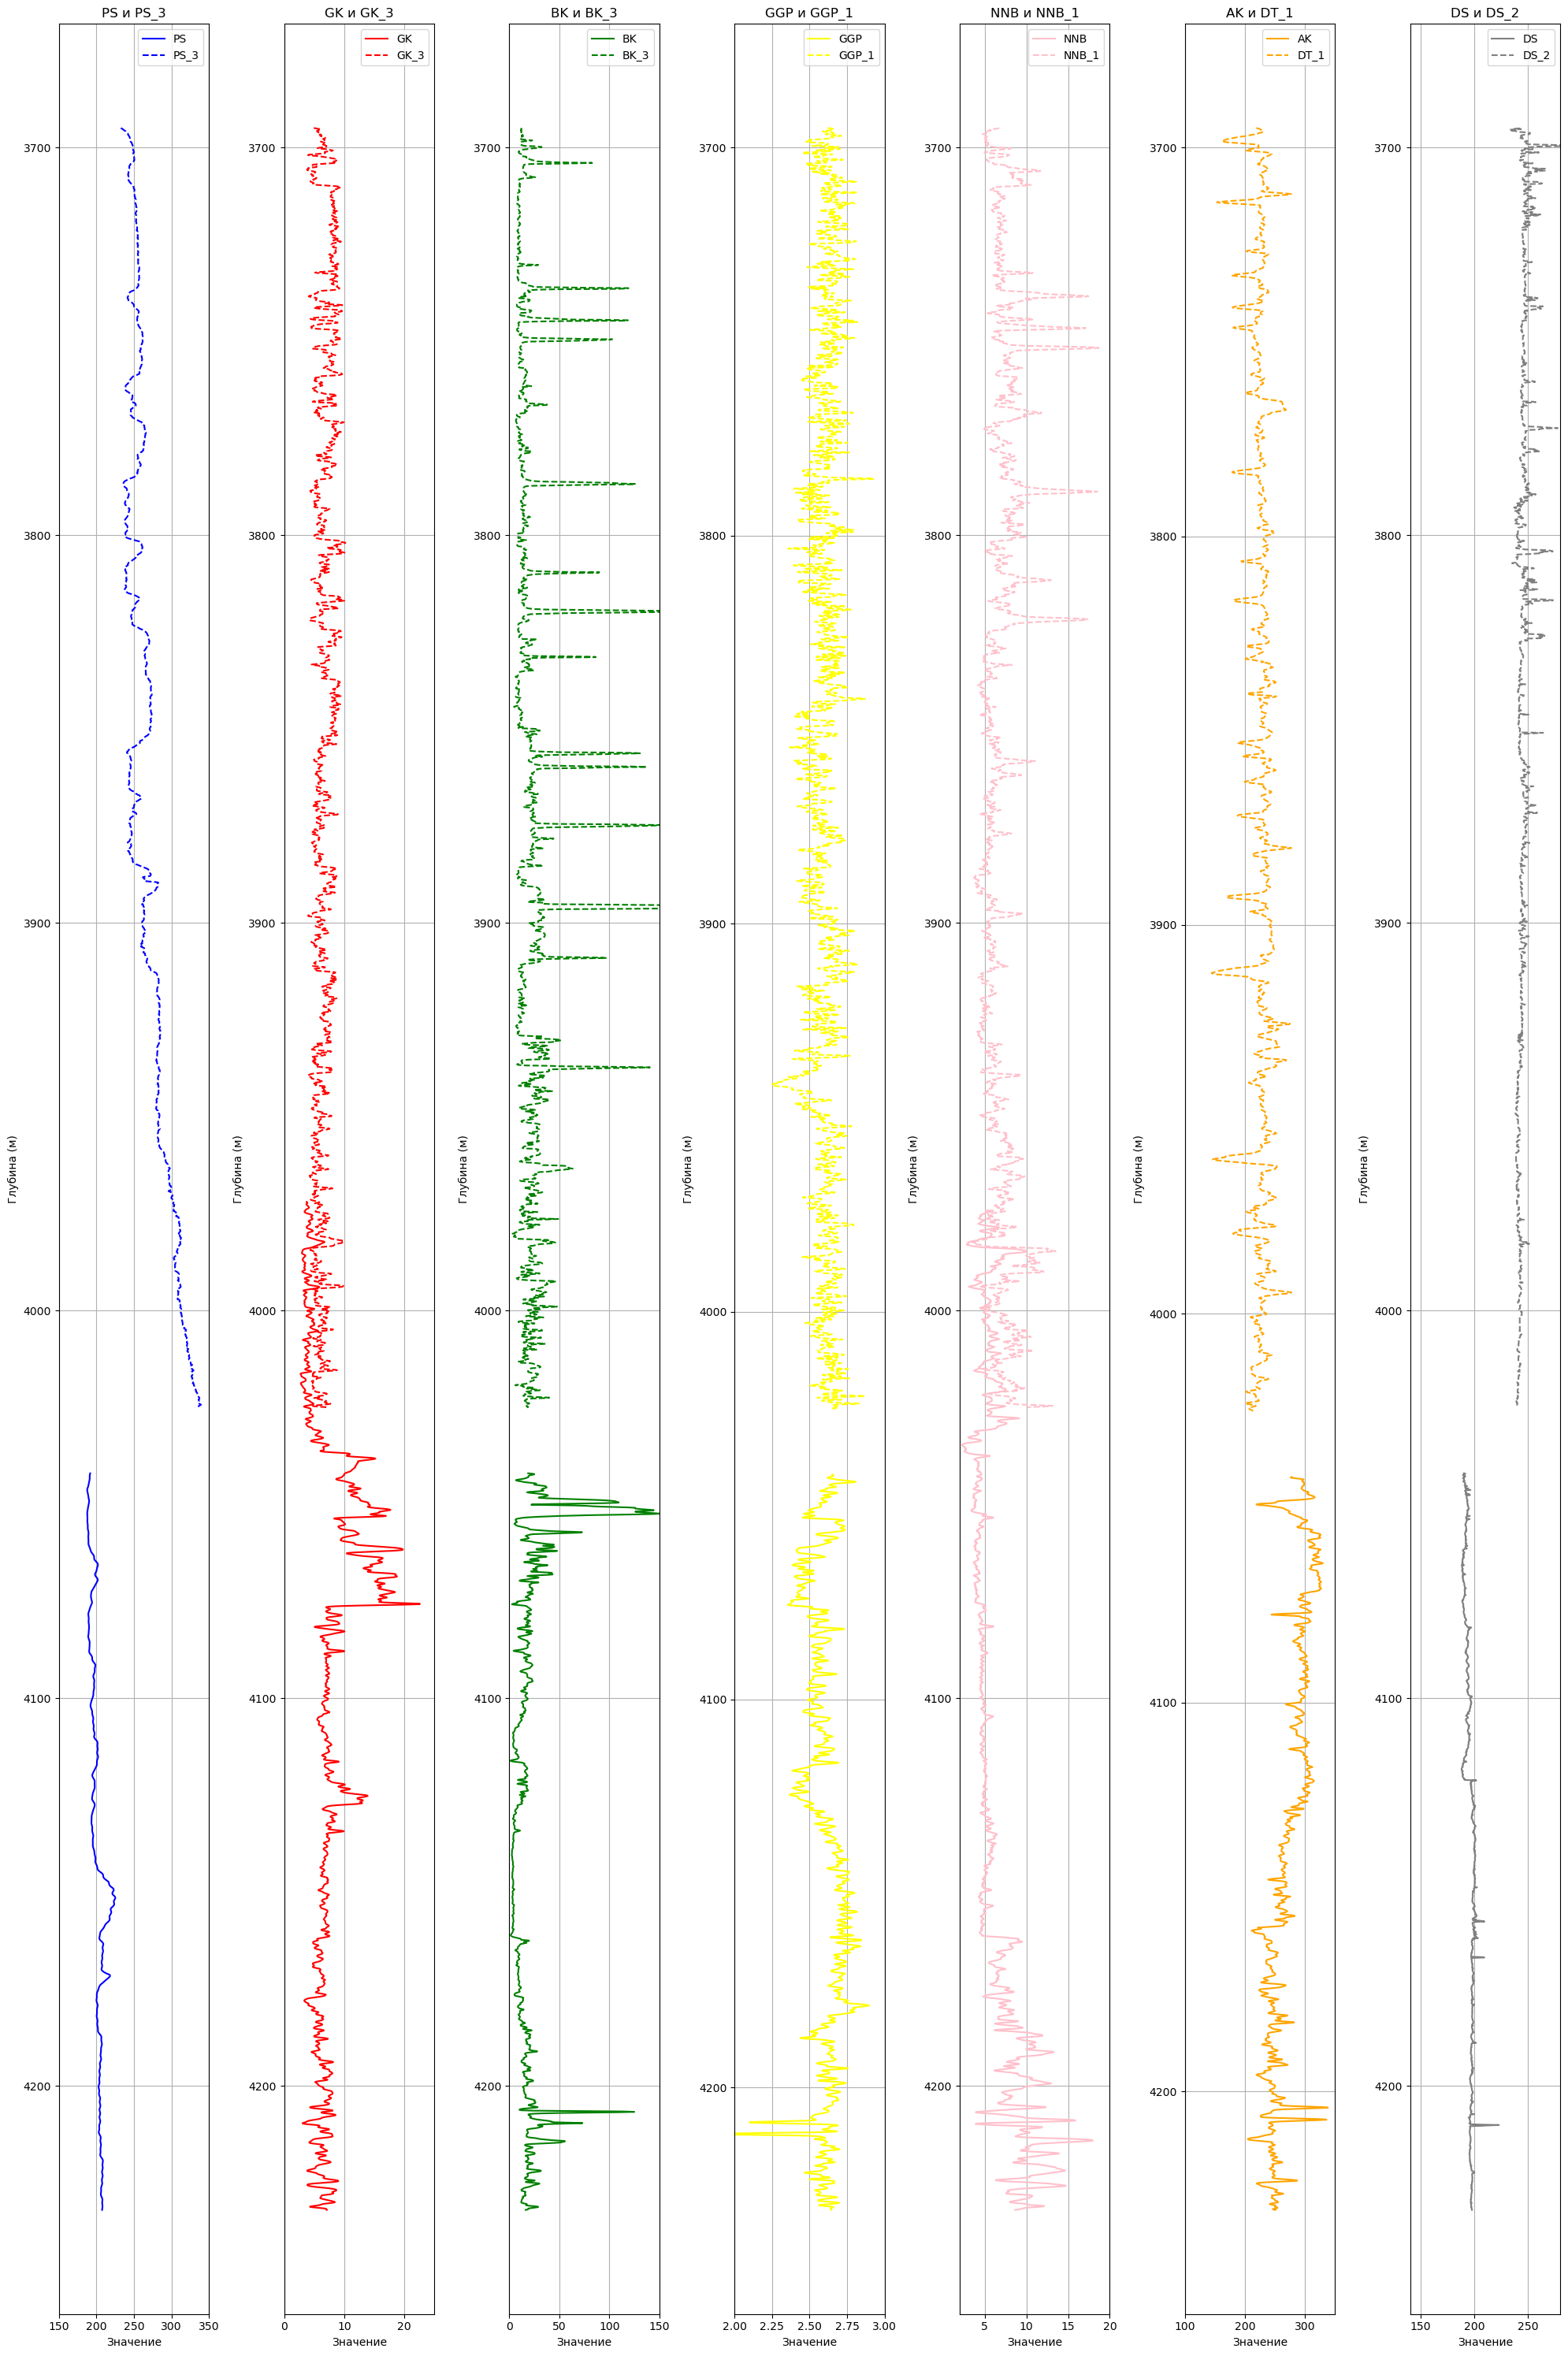

In [12]:
#у кривых обрезаем хвосты
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def clean_well_data(well_data):
    
    upper_logs_to_clean = ['PS_3', 'GK_3', 'BK_3', 'GGP_1', 'NNB_1', 'DS_2', 'DT_1']
    well_data.loc[(well_data["DEPT"] > 4025) | (well_data["DEPT"] < 3695), upper_logs_to_clean] = np.nan

    lower_logs_to_clean = ['PS', 'BK', 'GGP', 'AK', 'DS']
    well_data.loc[(well_data["DEPT"] < 4042), lower_logs_to_clean] = np.nan

def plot_well_curves(well_data, primary_curves, secondary_curves, colors, scales, depth_min=None, depth_max=None):
    # Фильтрация данных по глубине
    if depth_min is not None and depth_max is not None:
        well_data = well_data[(well_data['DEPT'] >= depth_min) & (well_data['DEPT'] <= depth_max)]
    
    # Создание фигуры и осей
    num_plots = len(primary_curves)
    fig, axes = plt.subplots(1, num_plots, figsize=(20, 30))
    
    if num_plots == 1:
        axes = [axes]
    
    # Построение графиков для каждой пары кривых
    for ax, primary, secondary, color, (x_min, x_max) in zip(axes, primary_curves, secondary_curves, colors, scales):
        # Основная кривая
        ax.plot(well_data[primary], well_data['DEPT'], color=color, label=primary)
        # Вспомогательная кривая (пунктирная линия)
        ax.plot(well_data[secondary], well_data['DEPT'], color=color, linestyle='--', label=secondary)
        
        # Настройка осей и внешнего вида
        ax.set_xlim(x_min, x_max)
        ax.set_xlabel("Значение")
        ax.set_ylabel("Глубина (м)")
        ax.invert_yaxis()  # Глубина увеличивается сверху вниз
        ax.grid(True)  # Сетка
        ax.legend()  # Легенда
        ax.set_title(f"{primary} и {secondary}")  # Заголовок
    
    # Отображение графиков
    plt.tight_layout()
    plt.show()

# Очистка данных
clean_well_data(well_1)

# Данные для построения
primary_curves = ['PS', 'GK', 'BK', 'GGP', 'NNB', 'AK', 'DS']
secondary_curves = ['PS_3', 'GK_3', 'BK_3', 'GGP_1', 'NNB_1', 'DT_1', 'DS_2']
colors = ["blue", "red", "green", "yellow", "pink", "orange", "grey"]
scales = [(150, 350), (0, 25), (0, 150), (2, 3), (2, 20), (100, 350), (140, 280)]

# Пример вызова с ограничением глубины
plot_well_curves(well_1, primary_curves, secondary_curves, colors, scales, depth_min=3695, depth_max=4250)

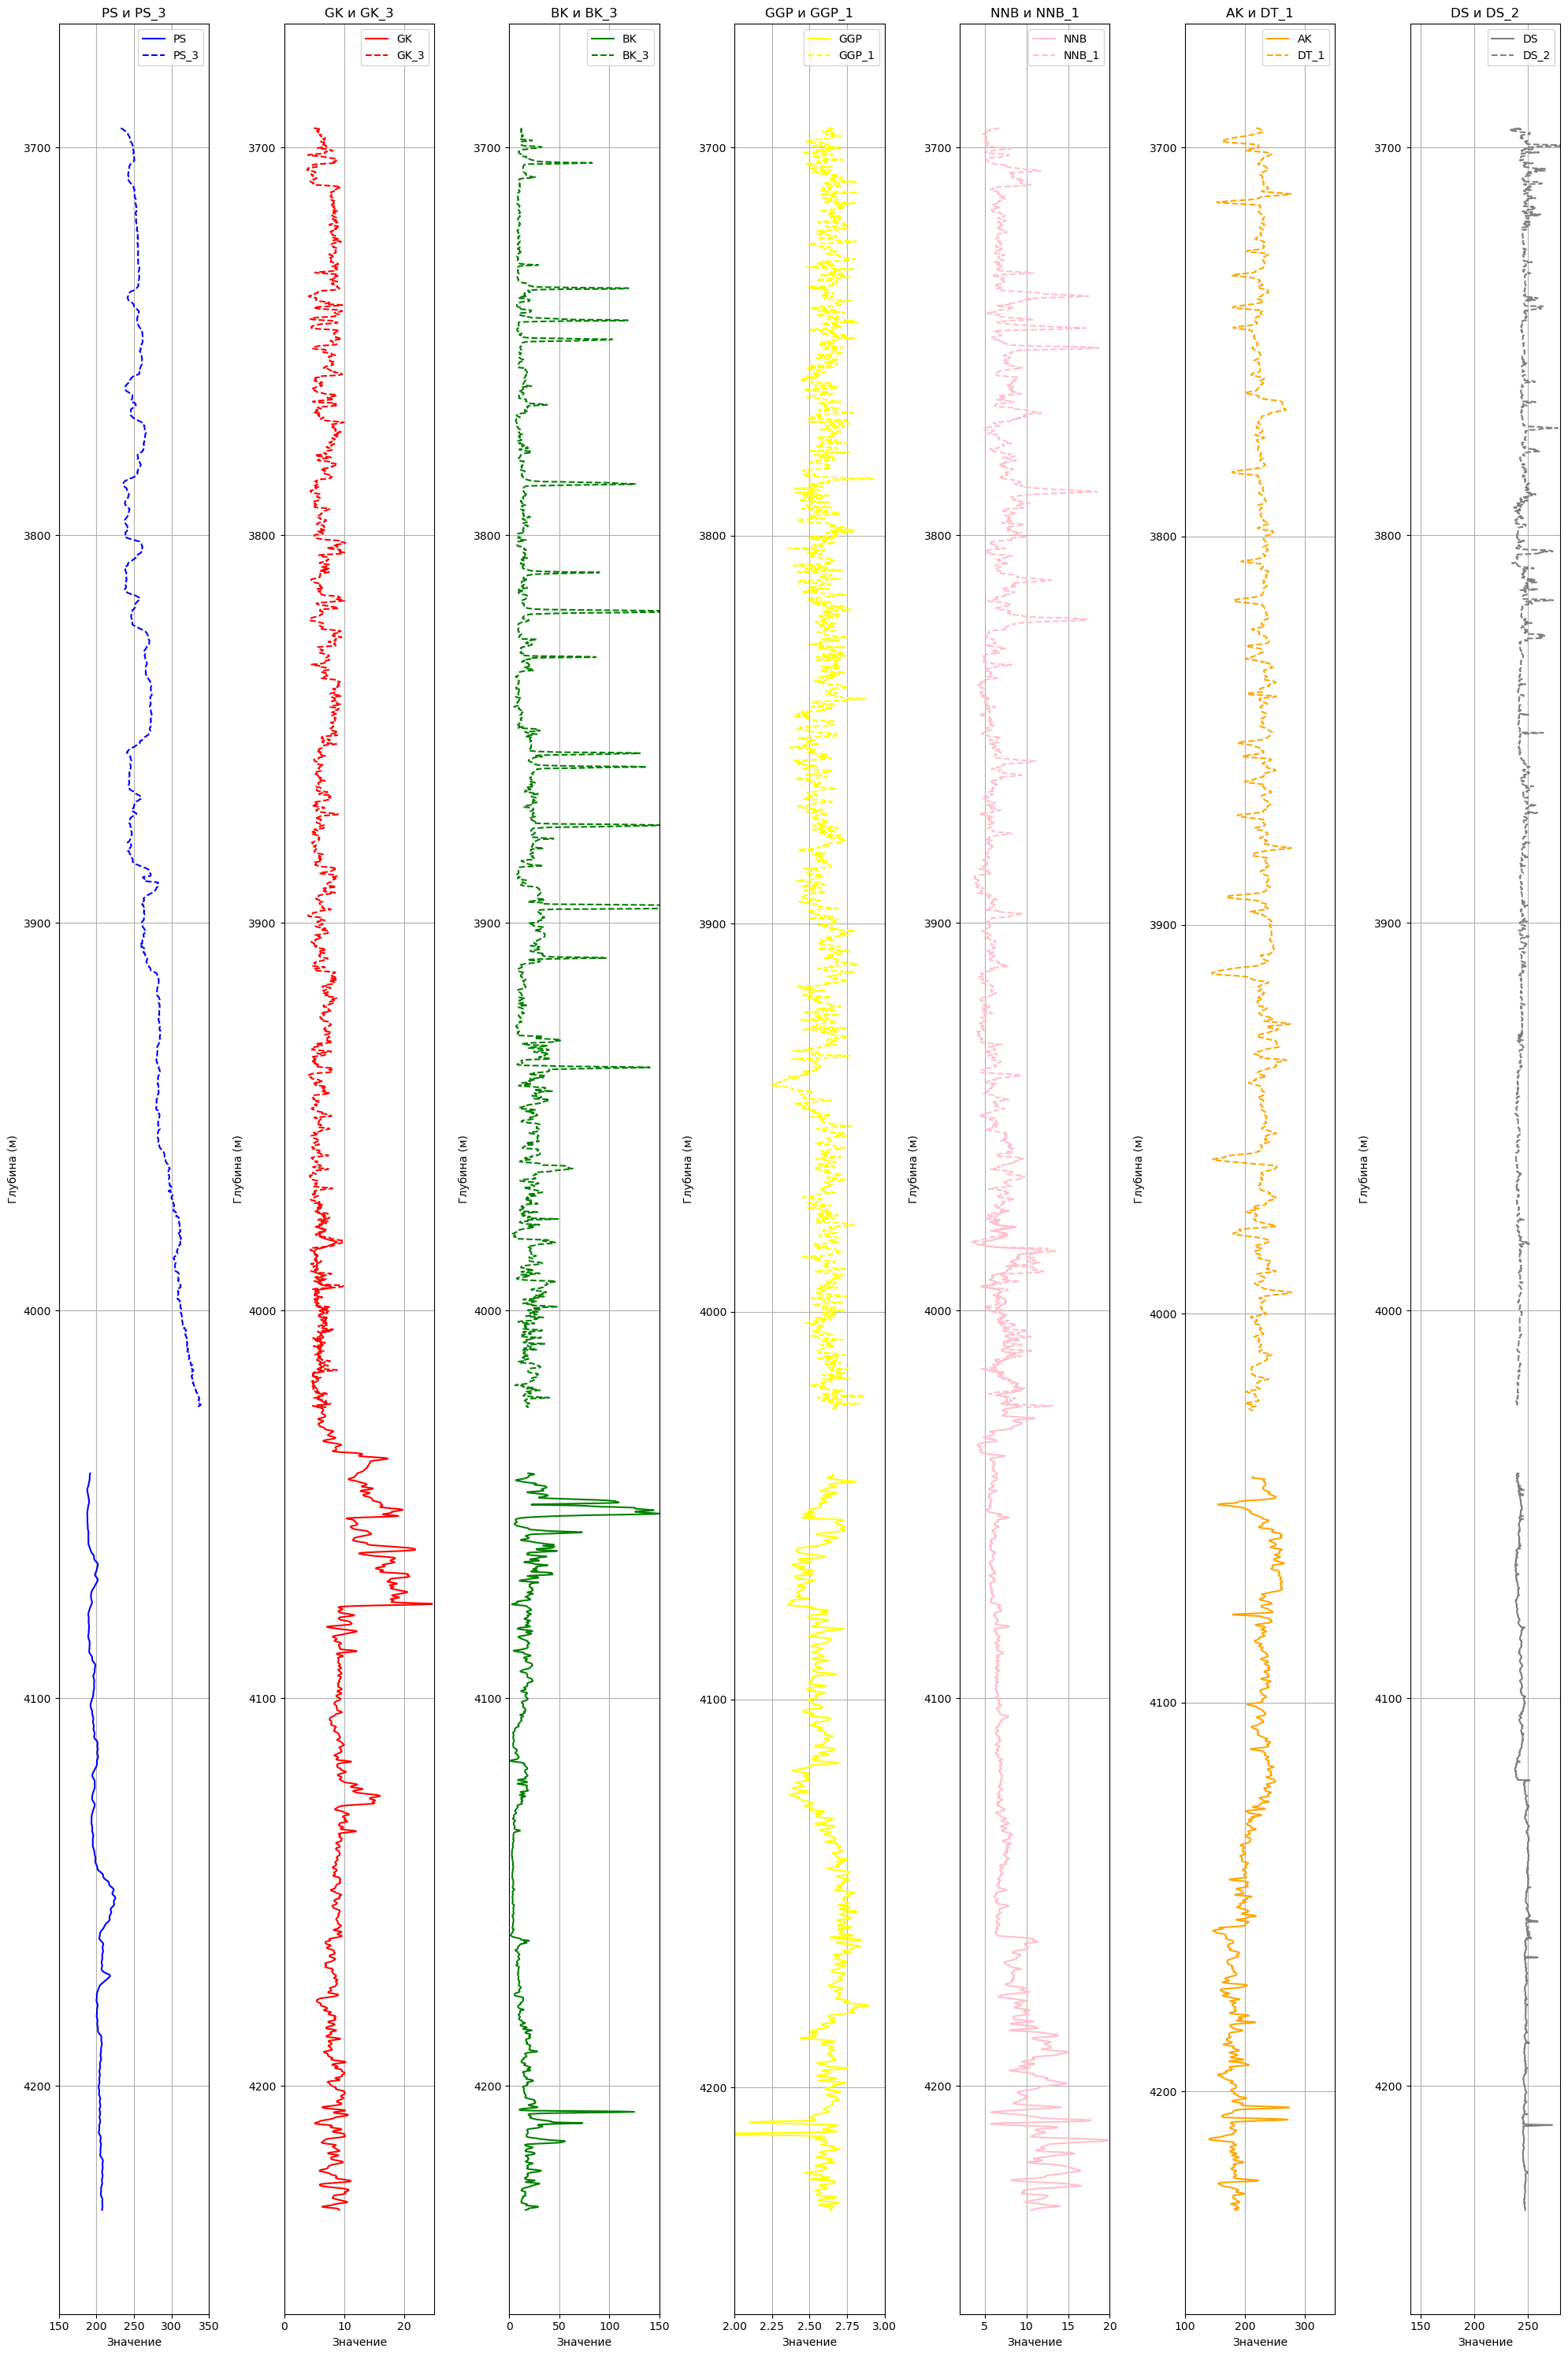

In [13]:
# Корректировка кривых. двигаем кривые до их свопадения в зоне перекрытия.
curves_to_move = [('GK', 'GK_3'), ('NNB', 'NNB_1'), ('AK', 'DT_1'), ('DS', 'DS_2')]

for i, j in curves_to_move:
    longest, shortest = (i, j) if len(well_1[i].dropna()) > len(well_1[j].dropna()) else (j, i)
    gap = (well_1[longest].dropna().iloc[-1] - well_1[shortest].dropna().iloc[0] 
           if well_1[i].first_valid_index() > well_1[j].last_valid_index() 
           else well_1[longest][well_1[shortest].first_valid_index()] - well_1[shortest][well_1[shortest].first_valid_index()])
    well_1[shortest] += gap

# Визуализация
plot_well_curves(well_1, primary_curves, secondary_curves, colors, scales, depth_min=3695, depth_max=4250)

Сшиваем кривые следующим способом: где есть перекрытие, отдаем предпочтение самой длинной кривой, где перекрытия нет - интерполируем

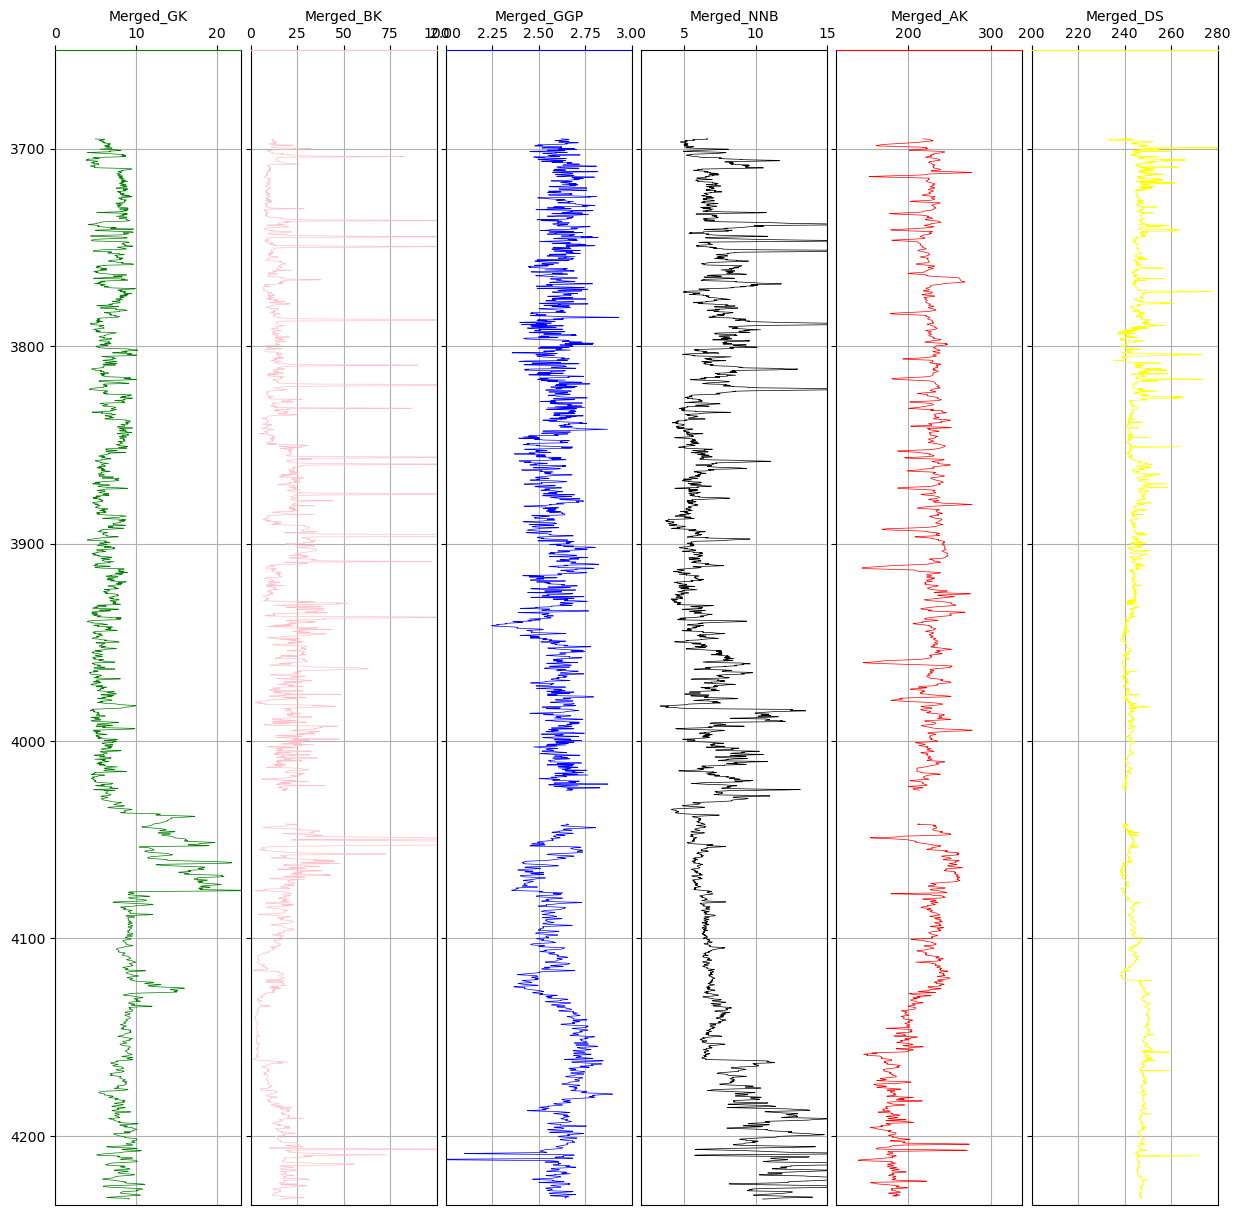

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Объединение кривых
curve_pairs = [('GK', 'GK_3'), ('NNB', 'NNB_1'), ('AK', 'DT_1'), ('DS', 'DS_2'), ('BK', 'BK_3'), ('GGP', 'GGP_1')]

for primary, secondary in curve_pairs:
    merged_name = f'Merged_{primary}'
    
    # Определяем какая кривая длиннее
    primary_len = len(well_1[primary].dropna())
    secondary_len = len(well_1[secondary].dropna())
    longest = primary if primary_len > secondary_len else secondary
    shortest = secondary if longest == primary else primary
    
    # Определяем зоны перекрытия
    primary_start = well_1[primary].first_valid_index()
    primary_end = well_1[primary].last_valid_index()
    secondary_start = well_1[secondary].first_valid_index()
    secondary_end = well_1[secondary].last_valid_index()
    
    # Создаем объединенную кривую
    well_1[merged_name] = np.nan  # Инициализируем
    
    # 1. В зоне перекрытия используем самую длинную кривую
    overlap_start = max(primary_start, secondary_start)
    overlap_end = min(primary_end, secondary_end)
    
    if overlap_start <= overlap_end:  # Если есть перекрытие
        well_1.loc[overlap_start:overlap_end, merged_name] = well_1.loc[overlap_start:overlap_end, longest]
    
    # 2. Вне зоны перекрытия используем обе кривые как есть (без интерполяции)
    # Для primary кривой
    well_1.loc[primary_start:primary_end, merged_name] = well_1.loc[primary_start:primary_end, merged_name].combine_first(
        well_1.loc[primary_start:primary_end, primary])
    
    # Для secondary кривой
    well_1.loc[secondary_start:secondary_end, merged_name] = well_1.loc[secondary_start:secondary_end, merged_name].combine_first(
        well_1.loc[secondary_start:secondary_end, secondary])

# Визуализация объединенных кривых (остается без изменений)
def visualize_merged_logs():
    curve_names = ['Merged_GK', 'Merged_BK', 'Merged_GGP', 'Merged_NNB', 'Merged_AK', 'Merged_DS']
    colors = ["green", "pink", "blue", "black", "red", "yellow"]
    scales = [(0, 23), (0, 100), (2, 3), (2, 15), (114, 338), (200, 280)]

    fig, axes = plt.subplots(nrows=1, ncols=len(curve_names), figsize=(15, 15), sharey=True)
    
    for ax, curve, color, (x_min, x_max) in zip(axes, curve_names, colors, scales):
        ax.plot(well_1[curve], well_1["DEPT"], color=color, lw=0.5, label=curve)
        ax.set_xlim(x_min, x_max)
        ax.spines['top'].set_edgecolor(color)
        ax.set_xlabel(curve)
        ax.set_ylim(4235, 3650)
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.grid()

    for ax in axes[1:]:
        plt.setp(ax.get_yticklabels(), visible=False)

    fig.subplots_adjust(wspace=0.05)
    plt.show()

# Вызов функции визуализации
visualize_merged_logs()

In [16]:
Рассчитаем двойной разностный потенциал ГК – дГК

SyntaxError: invalid character '–' (U+2013) (714543602.py, line 1)

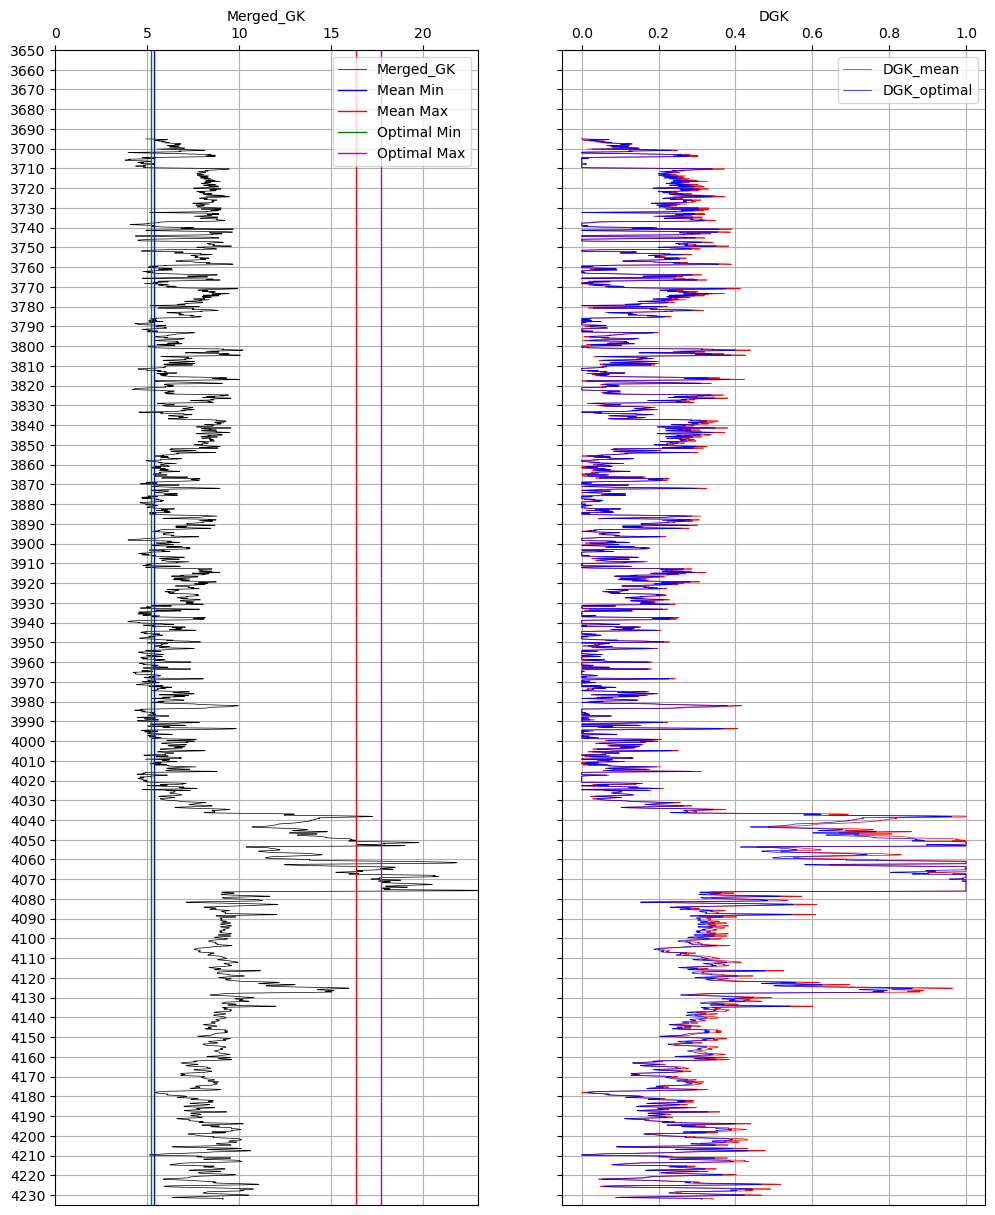

In [17]:
# Определение интервалов
min_interval = (3960, 3970)  # Пласт для минимального значения ГК
max_interval = (4060, 4080)  # Пласт для максимального значения ГК

# Среднее значение
mean_min = well_1.loc[(well_1["DEPT"] >= min_interval[0]) & (well_1["DEPT"] <= min_interval[1]), 'Merged_GK'].mean()
mean_max = well_1.loc[(well_1["DEPT"] >= max_interval[0]) & (well_1["DEPT"] <= max_interval[1]), 'Merged_GK'].mean()

# Оптимальное значение (медиана)
optimal_min = well_1.loc[(well_1["DEPT"] >= min_interval[0]) & (well_1["DEPT"] <= min_interval[1]), 'Merged_GK'].median()
optimal_max = well_1.loc[(well_1["DEPT"] >= max_interval[0]) & (well_1["DEPT"] <= max_interval[1]), 'Merged_GK'].median()

# Расчет дГК по двум методикам
# Методика 1: Использование средних значений
well_1['DGK_mean'] = (well_1['Merged_GK'] - mean_min) / (mean_max - mean_min)

# Методика 2: Использование оптимальных значений
well_1['DGK_optimal'] = (well_1['Merged_GK'] - optimal_min) / (optimal_max - optimal_min)

# Ограничение значений дГК в диапазоне [0, 1]
well_1['DGK_mean'] = well_1['DGK_mean'].clip(0, 1)
well_1['DGK_optimal'] = well_1['DGK_optimal'].clip(0, 1)

# Построение графиков
fig, axes = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(12, 15))

# График для Merged_GK
axes[0].plot(well_1['Merged_GK'], well_1['DEPT'], 'black', lw=0.5, label='Merged_GK')
axes[0].axvline(x=mean_min, color='b', lw=1, label='Mean Min')
axes[0].axvline(x=mean_max, color='r', lw=1, label='Mean Max')
axes[0].axvline(x=optimal_min, color='g', lw=1, label='Optimal Min')
axes[0].axvline(x=optimal_max, color='m', lw=1, label='Optimal Max')
axes[0].set_xlim(0, 23)
axes[0].set_ylim(4235, 3650)
axes[0].spines['top'].set_edgecolor('black')
axes[0].set_xlabel('Merged_GK')
axes[0].set_yticks(np.arange(3650, 4235, 10))
axes[0].xaxis.set_ticks_position("top")
axes[0].xaxis.set_label_position("top")
axes[0].grid()
axes[0].legend()

# График для DGK_mean и DGK_optimal на одном графике
axes[1].plot(well_1['DGK_mean'], well_1['DEPT'], 'r', lw=0.5, label='DGK_mean')
axes[1].plot(well_1['DGK_optimal'], well_1['DEPT'], 'b', lw=0.5, label='DGK_optimal')
axes[1].set_ylim(4235, 3650) 
axes[1].spines['top'].set_edgecolor('black')
axes[1].set_xlabel('DGK')
axes[1].xaxis.set_ticks_position("top")
axes[1].xaxis.set_label_position("top")
axes[1].grid()  
axes[1].legend()

plt.show()